# Fenix Shipping 

Fenix Shipping aims to optimize its logistics by 
<br>analyzing its vast order and shipping data, 
<br>identifying patterns, and improving efficiency.


In this project, I will use Python for Data Analysis. 
<br>Streamlit for interactive visualizations, and
<br>ChatGPT for data interpretation.


The analysis will serve as a crucial tool for 
<br>Fenix Shipping, enabling the company to 
<br> streamline its shipping processes, 
<br> tailor its services to customer preferences, 
<br> and ultimately enhance its operational 
<br> efficiency and customer satisfaction.

ChatGPT Conversation here:
https://chatgpt.com/share/0d10aca7-d3f7-49b2-b16b-1f50d8390d73

Data from Coursera at:
https://www.coursera.org/learn/data-visualization-with-chatgpt-python-for-dashboarding/lecture/ZKpbI/task-1-setup-environments

In ChatGPT we run the prompt:

> Describe the schema of the uploaded file including table names, fields, data types and relationships between entities. Return all analysis in Markdown code.

And we upload the fenix-shipping-data.xlsx


In [1]:
# Tools used:
# !pip install openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the uploaded Excel file to inspect its contents
file_path = 'Fenix-Shipping-Data.xlsx'
excel_file = pd.ExcelFile(file_path)

# List the sheet names to understand the structure
sheet_names = excel_file.sheet_names
sheet_names


['Sheet1']

We analyzed only sheet1, so now we run:


In [3]:
# Load the data from the first sheet to inspect the schema
df = pd.read_excel(excel_file, sheet_name=sheet_names[0])

# Get the general schema information like column names, data types, and preview of the data
schema_info = df.dtypes
preview_data = df.head()

schema_info, preview_data


(order_id                      int64
 customer_id                  object
 employee_id                   int64
 order_date           datetime64[ns]
 required_date        datetime64[ns]
 shipped_date         datetime64[ns]
 ship_via                      int64
 freight                     float64
 ship_name                    object
 ship_address                 object
 ship_city                    object
 ship_region                  object
 ship_postal_code             object
 ship_country                 object
 product_id                    int64
 unit_price_x                float64
 quantity                      int64
 discount                    float64
 product_name                 object
 supplier_id                   int64
 category_id                   int64
 quantity_per_unit            object
 unit_price_y                float64
 units_in_stock                int64
 units_on_order                int64
 reorder_level                 int64
 discontinued                  int64
 

# Schema of Fenix Shipping Data

## Table: Orders
This table captures detailed order information.

| Field Name      | Data Type           | Description                             |
|-----------------|---------------------|-----------------------------------------|
| `order_id`      | int64               | Unique identifier for each order.       |
| `customer_id`   | object              | Identifier for the customer.            |
| `employee_id`   | int64               | Identifier for the employee handling the order. |
| `order_date`    | datetime64[ns]      | Date the order was placed.              |
| `required_date` | datetime64[ns]      | Date by which the order is required.    |
| `shipped_date`  | datetime64[ns]      | Date the order was shipped.             |
| `ship_via`      | int64               | Shipping method identifier.             |
| `freight`       | float64             | Freight charges for the order.          |
| `ship_name`     | object              | Name of the shipping recipient.         |
| `ship_address`  | object              | Address for shipping.                   |
| `ship_city`     | object              | City for shipping.                      |
| `ship_region`   | object              | Region for shipping.                    |
| `ship_postal_code` | object           | Postal code for shipping.               |
| `ship_country`  | object              | Country for shipping.                   |

## Table: Products
This section relates to product information linked to each order.

| Field Name        | Data Type      | Description                             |
|-------------------|----------------|-----------------------------------------|
| `product_id`      | int64          | Unique identifier for each product.     |
| `unit_price_x`    | float64        | Unit price of the product in the order. |
| `quantity`        | int64          | Quantity ordered.                       |
| `discount`        | float64        | Discount applied on the product.        |
| `product_name`    | object         | Name of the product.                    |
| `supplier_id`     | int64          | Identifier for the supplier.            |
| `category_id`     | int64          | Identifier for the product category.    |
| `quantity_per_unit` | object       | Quantity per unit for the product.      |
| `unit_price_y`    | float64        | Supplier's price per unit.              |
| `units_in_stock`  | int64          | Number of units currently in stock.     |
| `units_on_order`  | int64          | Units on order from supplier.           |
| `reorder_level`   | int64          | Stock level triggering reorder.         |
| `discontinued`    | int64          | Flag indicating whether the product is discontinued (1 = Yes, 0 = No). |

## Table: Categories
This section covers the product categories.

| Field Name     | Data Type     | Description                             |
|----------------|---------------|-----------------------------------------|
| `category_name`| object        | Name of the product category.           |
| `description`  | object        | Description of the category.            |
| `picture`      | object        | Binary image or reference related to the category. |

## Table: Suppliers
This section contains information on product suppliers.

| Field Name     | Data Type     | Description                             |
|----------------|---------------|-----------------------------------------|
| `company_name` | object        | Name of the supplier company.           |
| `contact_name` | object        | Name of the supplier contact.           |
| `contact_title`| object        | Title of the supplier contact.          |
| `address`      | object        | Address of the supplier.                |
| `city`         | object        | City where the supplier is located.     |
| `region`       | object        | Region where the supplier is located.   |
| `postal_code`  | object        | Postal code for the supplier's location.|
| `country`      | object        | Country of the supplier.                |
| `phone`        | object        | Supplier's phone number.                |
| `fax`          | object        | Supplier's fax number (if available).   |
| `homepage`     | object        | Supplier's homepage (if available).     |

## Relationships Between Entities
- **Orders and Products:** `order_id` links each order with its associated products. The same order may have multiple products.
- **Products and Categories:** `category_id` connects each product to its category.
- **Products and Suppliers:** `supplier_id` links each product to its supplier.


Now let's say we want to explore a specific aspect of this data
 like the largest volume products, or the key revenue drivers and customers
 
 We can ask ChatGPT:

> Can you provide an analysis of the sales trends over the last quarter from the uploaded data? The last quarter being from April 1st, 1998 until the end?


In [4]:
# To analyze the sales trends, we will first need to focus on the relevant fields.
# Let's extract the date range for the last quarter from the 'order_date' column and analyze sales (freight, quantity, etc.) over this period.
# Define the last quarter based on the 'order_date' column
last_quarter_end = '1998-06-30'
last_quarter_start = '1998-04-01'

# Filter the dataset to get only the orders within the last quarter
last_quarter_data = df[(df['order_date'] >= last_quarter_start) & (df['order_date'] <= last_quarter_end)]

# Aggregating sales data over the last quarter
sales_trends = last_quarter_data.groupby('order_date').agg({
    'freight': 'sum',
    'quantity': 'sum'
}).reset_index()

# Calculate some basic stats for the freight charges and quantities over time
peak_freight_date = sales_trends.loc[sales_trends['freight'].idxmax()]
peak_quantity_date = sales_trends.loc[sales_trends['quantity'].idxmax()]

# Trend analysis for the total freight and quantities over the last quarter
sales_trends['freight_moving_avg'] = sales_trends['freight'].rolling(window=7).mean()  # 7-day moving average
sales_trends['quantity_moving_avg'] = sales_trends['quantity'].rolling(window=7).mean()

# Save the sales trends to a CSV file for review
sales_trends.to_csv('Last_Quarter_Sales_Trends.csv', index=False)

print(sales_trends)

# Prepare the analysis summary
analysis_summary = {
    'last_quarter_start': last_quarter_start,
    'last_quarter_end': last_quarter_end,
    'peak_freight_date': peak_freight_date['order_date'],
    'peak_freight_amount': peak_freight_date['freight'],
    'peak_quantity_date': peak_quantity_date['order_date'],
    'peak_quantity_amount': peak_quantity_date['quantity'],
    'average_freight_per_day': sales_trends['freight'].mean(),
    'average_quantity_per_day': sales_trends['quantity'].mean(),
    'freight_trend': 'increasing' if pd.Series(np.polyfit(range(len(sales_trends)), sales_trends['freight'], 1))[0] > 0 else 'decreasing',
    'quantity_trend': 'increasing' if pd.Series(np.polyfit(range(len(sales_trends)), sales_trends['quantity'], 1))[0] > 0 else 'decreasing'
}

# Print analysis summary to the console
for key, value in analysis_summary.items():
    print(f"{key}: {value}")


   order_date  freight  quantity  freight_moving_avg  quantity_moving_avg
0  1998-04-01   607.86       503                 NaN                  NaN
1  1998-04-02   158.65        82                 NaN                  NaN
2  1998-04-03   592.02       215                 NaN                  NaN
3  1998-04-06  1563.93       360                 NaN                  NaN
4  1998-04-07   141.56        34                 NaN                  NaN
5  1998-04-08  1022.43       274                 NaN                  NaN
6  1998-04-09   920.65       272          715.300000           248.571429
7  1998-04-10   100.44        92          642.811429           189.857143
8  1998-04-13  2304.07       205          949.300000           207.428571
9  1998-04-14  1789.40       291         1120.354286           218.285714
10 1998-04-15   449.96       161          961.215714           189.857143
11 1998-04-16   259.90       142          978.121429           205.285714
12 1998-04-17  6447.15       708      

# Sales Trends Analysis for the Last Quarter (April 1st, 1998 - June 30th, 1998)

## Summary
- **Analysis Period:** April 1st, 1998 to June 30th, 1998
- **Peak Freight Date:** April 17th, 1998
- **Peak Freight Amount:** 6,447.15 (highest total freight on a single day)
- **Peak Quantity Date:** April 17th, 1998
- **Peak Quantity Amount:** 708 units (highest total quantity on a single day)
- **Average Freight Per Day:** 875.43
- **Average Quantity Per Day:** 215.42
- **Freight Trend:** Decreasing
- **Quantity Trend:** Decreasing

## Key Observations:
- The highest sales activity in terms of both freight and quantity occurred on April 17th, 1998.
- Over the quarter, the overall trends for both freight and quantity show a downward (decreasing) trajectory.


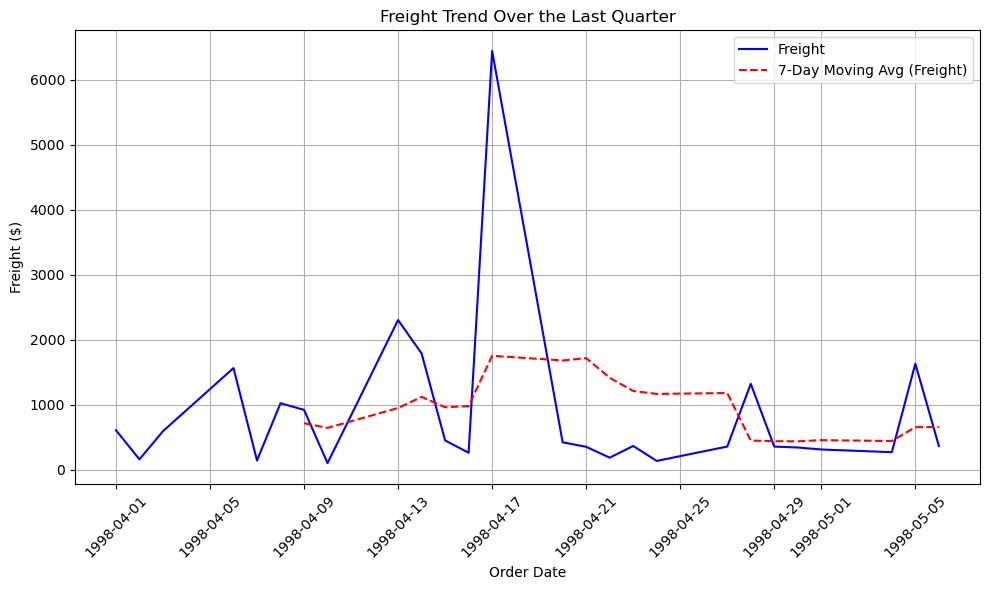

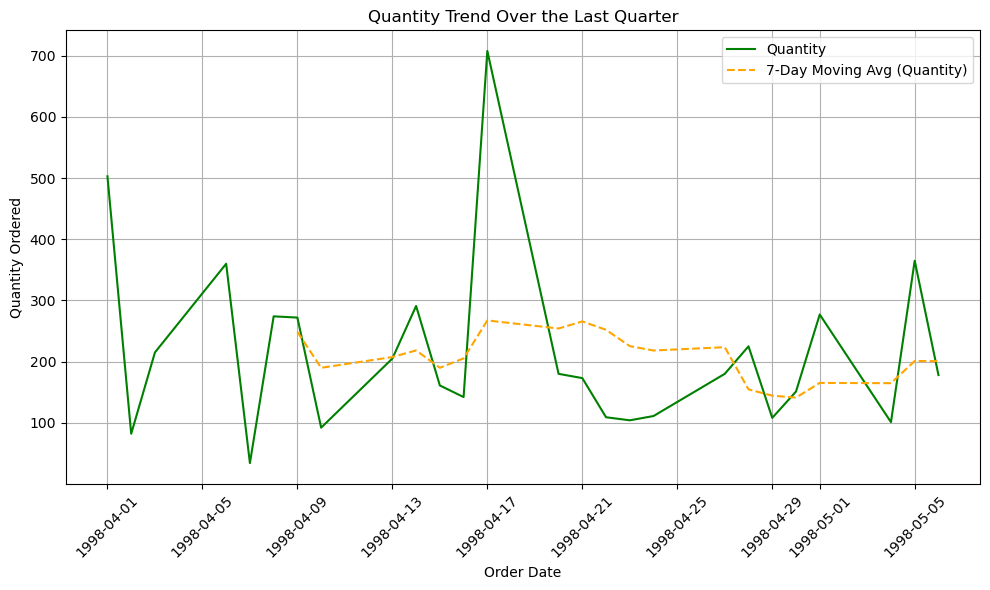

In [5]:
# Plot for freight trend
plt.figure(figsize=(10, 6))
plt.plot(sales_trends['order_date'], sales_trends['freight'], label='Freight', color='blue')
plt.plot(sales_trends['order_date'], sales_trends['freight_moving_avg'], label='7-Day Moving Avg (Freight)', linestyle='--', color='red')
plt.title('Freight Trend Over the Last Quarter')
plt.xlabel('Order Date')
plt.ylabel('Freight ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for quantity trend
plt.figure(figsize=(10, 6))
plt.plot(sales_trends['order_date'], sales_trends['quantity'], label='Quantity', color='green')
plt.plot(sales_trends['order_date'], sales_trends['quantity_moving_avg'], label='7-Day Moving Avg (Quantity)', linestyle='--', color='orange')
plt.title('Quantity Trend Over the Last Quarter')
plt.xlabel('Order Date')
plt.ylabel('Quantity Ordered')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


If the initial analysis raises questions or some parts of the dataset are unclear, you can seek clarification. 

Let's insert an interactive prompt to explore this data. 

>can you please explain why there might be a sudden increase in sales according to the dataset?

This prompt helps you troubleshoot specific areas or anomalies in your data leveraging ChatGPT's analytical capabilities for clearer insights.

A sudden increase in sales, such as the spike observed on April 17, 1998, could be attributed to several potential factors based on the dataset:

### 1. **Seasonal Demand:**
   - Certain times of the year naturally see higher sales due to holidays, festivals, or peak business seasons. For example, if April coincides with a popular shopping period or holiday, it could explain the spike in orders.

### 2. **Promotional Event or Discounts:**
   - Companies often run sales promotions, discounts, or marketing campaigns to boost sales. If Fenix Shipping or its suppliers were running special offers around mid-April, this would likely attract more orders.

### 3. **Product Launch or Restocking:**
   - If new products were introduced or previously out-of-stock items became available again, it could lead to increased customer demand during that period.

### 4. **Bulk Orders from Large Customers:**
   - A sudden large order from a key customer or several bulk purchases could cause the sharp increase. This might reflect in the data if specific customers made larger-than-usual purchases in mid-April.

### 5. **Supply Chain Changes:**
   - Sometimes, changes in the supply chain, such as faster shipping options, lower freight costs, or better supplier availability, can drive higher order volumes. Customers may respond to improved logistics by placing more orders.

### 6. **Business Growth or Partnerships:**
   - Fenix Shipping may have expanded its customer base, entered into new partnerships, or onboarded a large new client during this period, which could drive an increase in both the volume and value of sales.

### 7. **Urgent Orders or Deadlines:**
   - If customers had urgent shipping needs due to approaching deadlines (e.g., fiscal year-end or project-based demand), they might have placed more orders within a short time frame.

Further analysis of the customer patterns, specific products sold, and historical promotions could help pinpoint the exact reason for the sales surge.


## NEXT PROMPT:

To uncover more profound insights, you can guide ChatGPT to analyze correlations or patterns. For example, we could ask it to:

> Identify any correlations between product categories and sales volumes in the dataset.

This prompt allows you to explore deeper relationships within the data, highlighting potential areas to increase sales or improve the product offering.

Note: Final prompt had to be adjusted as follows:

>Identify any correlations between product categories and sales volumes in the dataset. Return all analysis in markdown code. Make sure to include sales volume (not freight) as well as quantities, and sort by sales volume descending. Do not use ace_tools

In [6]:
# Grouping data by category and aggregating sales volume and quantity
category_sales = last_quarter_data.groupby('category_name').agg({
    'unit_price_x': lambda x: (x * last_quarter_data['quantity']).sum(),  # Sales volume (price * quantity)
    'quantity': 'sum'
}).reset_index()

# Renaming the aggregated column for clarity
category_sales.rename(columns={'unit_price_x': 'sales_volume'}, inplace=True)

# Sorting by sales volume in descending order
category_sales_sorted = category_sales.sort_values(by='sales_volume', ascending=False)

# Display the results
category_sales_sorted


,category_name,sales_volume,quantity
3,Dairy Products,37088.10,1040
0,Beverages,29067.00,1313
5,Meat/Poultry,26728.88,533
6,Produce,16406.05,412
1,Condiments,11811.50,505
2,Confections,11642.98,617
7,Seafood,11574.46,748
4,Grains/Cereals,10210.25,433


# Correlation Between Product Categories and Sales Volumes

The following analysis shows the relationship between product categories and sales volumes (based on total sales in dollars) along with the quantities ordered during the last quarter.

| Category Name     | Sales Volume ($) | Quantity Ordered |
|-------------------|------------------|------------------|
| Dairy Products    | 37,088.10        | 1,040            |
| Beverages         | 29,067.00        | 1,313            |
| Meat/Poultry      | 26,728.88        | 533              |
| Produce           | 16,406.05        | 412              |
| Condiments        | 11,811.50        | 505              |
| Confections       | 11,642.98        | 617              |
| Seafood           | 11,574.46        | 748              |
| Grains/Cereals    | 10,210.25        | 433              |

## Key Observations:
1. **Dairy Products** had the highest sales volume at $37,088.10, despite not having the highest quantity ordered, indicating that these products may have a higher price per unit.
2. **Beverages** had the highest quantity ordered (1,313 units) but came second in sales volume, suggesting lower-priced items compared to Dairy Products.
3. Categories such as **Meat/Poultry** and **Produce** follow with significant sales volumes and quantities.
4. **Grains/Cereals**, while having the lowest sales volume, still made up a notable quantity of 433 units.

The sales volume is sorted in descending order to highlight the top-performing product categories in terms of dollar amount.


## Final Prompt:


Finally, if you want to visualize the insights from your analysis, you just have to ask ChatGPT to generate visualization code with the following prompt:

> Generate a Python code snippet using matplotlib to create a bar chart, visualizing sales volume by product category from the dataset. Display the chart.

This prompt makes it possible to transition from data analysis to visualization, making it easier to share and communicate your findings with other people.

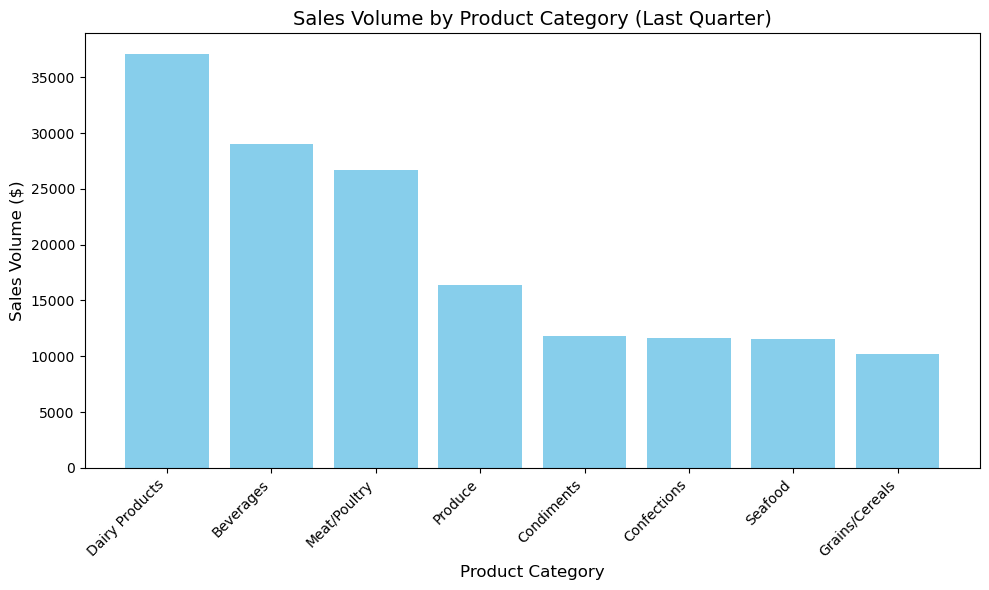

In [7]:
# Create a bar chart to visualize sales volume by product category
plt.figure(figsize=(10, 6))
plt.bar(category_sales_sorted['category_name'], category_sales_sorted['sales_volume'], color='skyblue')

# Adding title and labels
plt.title('Sales Volume by Product Category (Last Quarter)', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Sales Volume ($)', fontsize=12)

# Rotate category names on x-axis for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()
